In [31]:
from decifer import (
    Decifer,
    DeciferConfig,
    DeciferDataset
)
import matplotlib.pyplot as plt
from debyecalculator import DebyeCalculator
from pymatgen.io.cif import CifParser, Structure
import tempfile
import numpy as np
dataset = DeciferDataset("../data/crystallm/full/serialized/test.h5", ["cif_string", "xrd_cont.q", "xrd_cont.iq"])

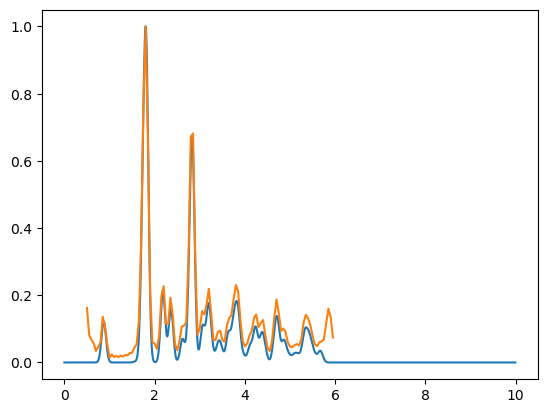

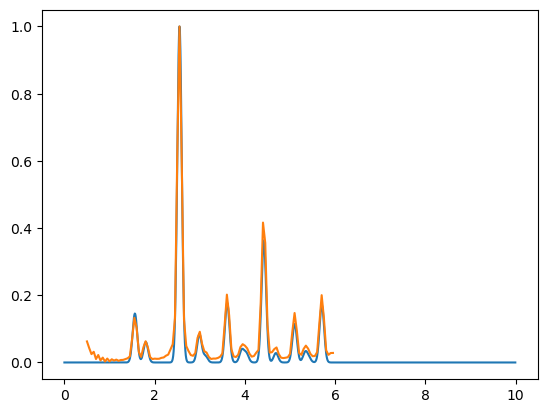

In [46]:
calc = DebyeCalculator(qmin=0.5, qmax=6, qstep=0.05)
for i, sample in enumerate(iter(dataset)):
    
    if i > 1:
        break
    
    cif, q, iq = sample
    structure = Structure.from_str(cif, fmt='cif')
    with tempfile.NamedTemporaryFile(suffix='.cif', delete=False) as temp:
        temp.write(cif.encode('utf-8'))
        
    dq, diq = calc.iq(temp.name, radii=30)
    diq /= np.max(diq)
    plt.plot(q, iq)
    plt.plot(dq, diq)
    plt.show()
    